# Actividad 4 - Módulo 4 : ANÁLISIS EXPLORATORIO Y PROGRAMACIÓN ESTADÍSTIC
### LIBRERÍA SEABORN
#### Autor: Nicolás Núñez

### Ejericio 1
Seaborn es una librería que contiene mucha utilidades. Una de ellas es un
conjunto de dataset de ejemplos con los que tendremos datos para analizar
y así no necesitaremos cargar archivos externos.
1. Averiguar cuáles son algunos de los dataset que contiene Seaborn.
    - tips, iris, titanic, flights, entre otros.
2. Cargar el dataset de titanic, se utilizará en los siguientes ejercicios.

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')
display(titanic)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


3. Confeccione un gráfico de barras para visualizar hombres y mujeres
que han sobrevivido.

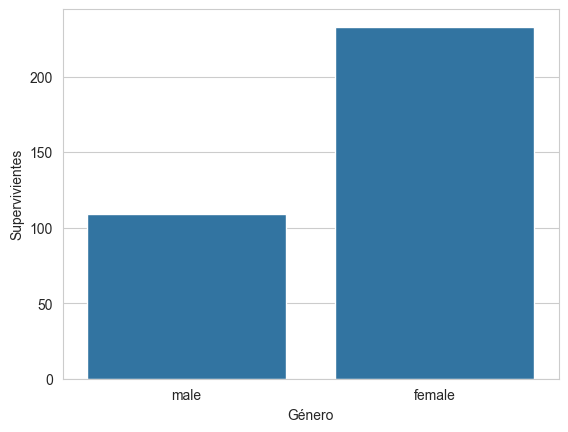

In [3]:
sns.set_style('whitegrid')
sns.barplot(x='sex', y='survived', data=titanic, estimator='sum', errorbar=None)
plt.xlabel('Género')
plt.ylabel('Supervivientes')
plt.show()

4. Crear un gráfico de distribución de edades por clase de pasajero .

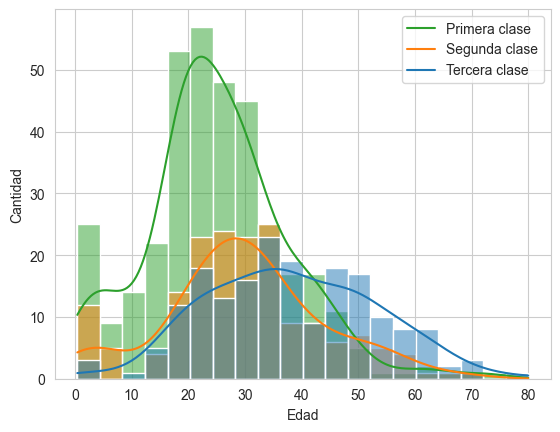

In [55]:
sns.set_style('whitegrid')
sns.histplot(data = titanic, x = 'age', hue='class', kde=True, legend=False)
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.legend(labels=['Primera clase', 'Segunda clase', 'Tercera clase'])
plt.show()

5. Diagrama de Caja (Boxplot) de Tarifas por Puerto de Embarque.

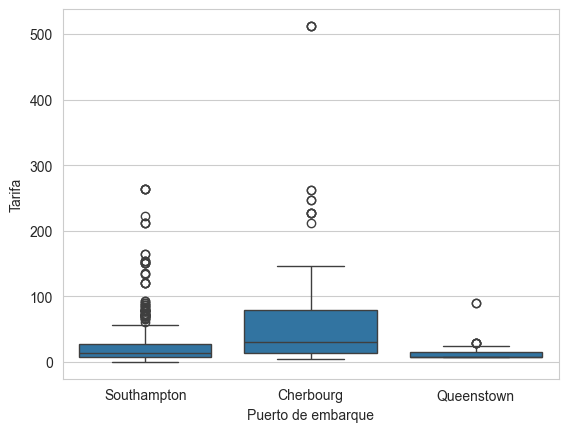

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(x = 'embark_town', y = 'fare', data = titanic)
plt.xlabel('Puerto de embarque')
plt.ylabel('Tarifa')
plt.show()

6. Gráfico de Violín de Edades por Supervivencia.

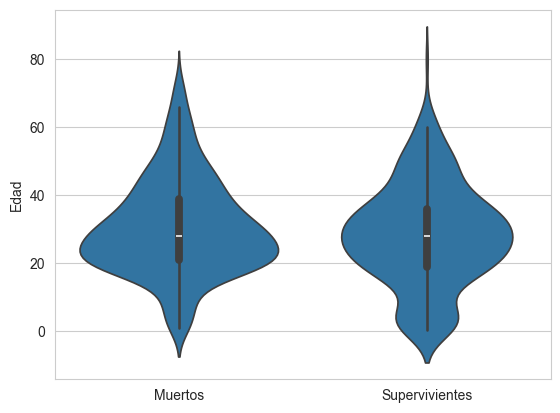

In [84]:
sns.set_style('whitegrid')
ax = sns.violinplot(y='age',x='survived', data = titanic)
ax.set_xticks([0,1])
ax.set_xticklabels(['Muertos', 'Supervivientes'])
plt.xlabel('')
plt.ylabel('Edad')
plt.show()

7.  Diagrama de dispersión de Tarifas vs. Edades por Supervivencia.

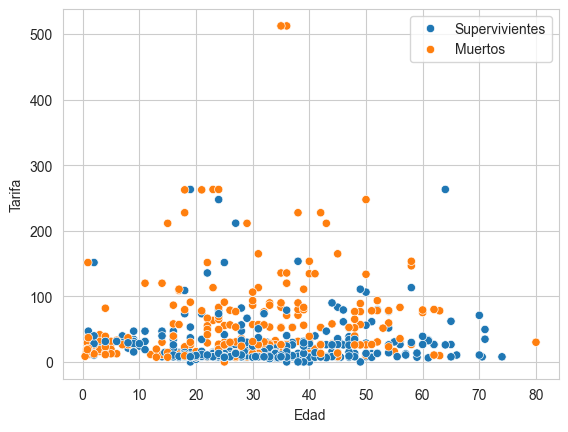

In [71]:
ax=sns.scatterplot(x='age', y='fare', hue='survived', data=titanic)
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Supervivientes', 'Muertos'], loc='upper right')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()

8.  Crear un gráfico de pilas agrupadas según supervivencia vs clase,
agrupadas por puerto de embarque.

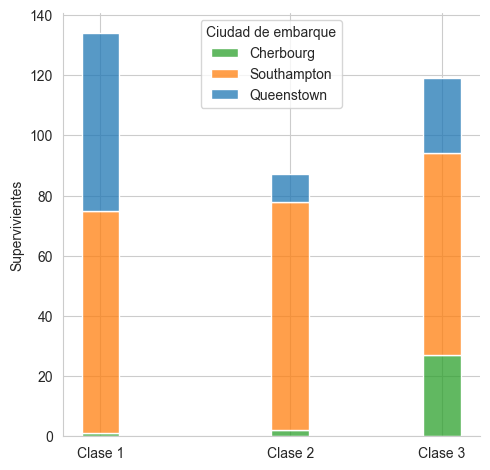

In [50]:
sns.displot(data=titanic[titanic['survived']==1], x='pclass', hue='embark_town', legend=False, multiple= 'stack')
plt.xticks([1.1, 2.1, 2.9], labels=['Clase 1', 'Clase 2', 'Clase 3'])
plt.legend(title='Ciudad de embarque', labels = titanic["embark_town"].unique()[[1,0,2]])
plt.xlabel('')
plt.ylabel('Supervivientes')
plt.show()

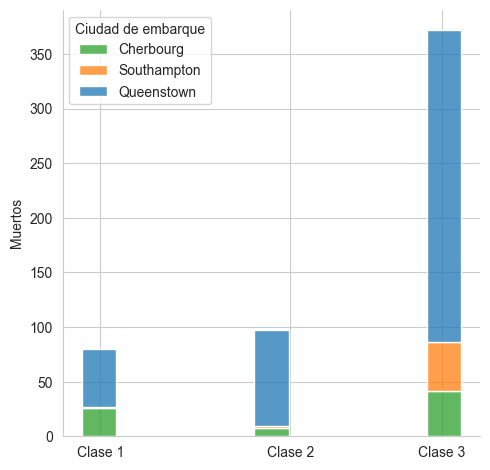

In [52]:
sns.displot(data=titanic[titanic['survived']==0], x='pclass', hue='embark_town', legend=False, multiple= 'stack')
plt.xticks([1.1, 2.1, 2.9], labels=['Clase 1', 'Clase 2', 'Clase 3'])
plt.legend(title='Ciudad de embarque', labels = titanic["embark_town"].unique()[[1,0,2]])
plt.xlabel('')
plt.ylabel('Muertos')
plt.show()

9. pairplot para mostrar gráficos de dispersión y histogramas de las
variables 'Age', 'Fare' y 'Pclass' del Titanic, diferenciando entre los
pasajeros que sobrevivieron y los que no.

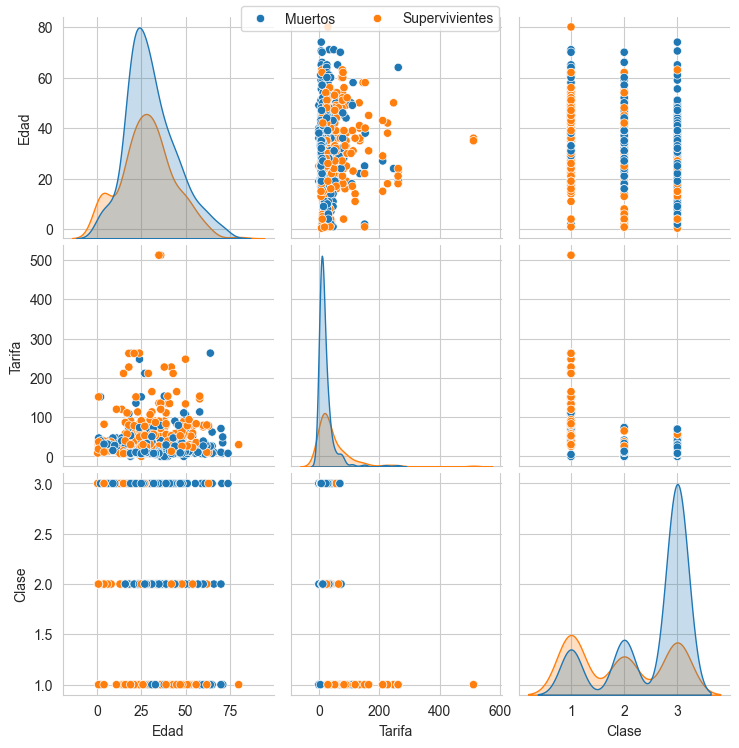

In [107]:
g = sns.pairplot(titanic, hue='survived', vars=['age', 'fare', 'pclass'])
# Correccion de etiquetas en los ejes
ylabels=["Edad","","","Tarifa","","","Clase","",""]
for ax, lbl in zip(g.axes.flatten(), ylabels):
    ax.set_ylabel(f'{lbl}')
xlabels=["","","","","","","Edad","Tarifa","Clase"]
for ax, lbl in zip(g.axes.flatten(), xlabels):
    ax.set_xlabel(f'{lbl}')
# Correccion de leyenda
handles = g._legend_data.values()
labels = g._legend_data.keys()
sns.move_legend(g, 'upper center', labels=['Muertos', 'Supervivientes'], title = None, frameon=True, ncol=2)

plt.show()